# Topic 4 -- Neural Networks

As we move on to using larger, more complex datasets, we soon run into an issue -- traditional linear and logistic regression is no longer sufficient to learn from those datasets. One might suggest to add a few extra features, like we did with polynomial regression, however when working with complex datasets already with many features, `PolynomialFeatures` would simply be too much and slow down computation dramatically.

Neural networks are state-of-the-art ML architectures derived from the humble logistic regression, and due to its "deep" nature, it is able to solve some of the most complex ML problems, kicking off the era of **Deep Learning**. In this notebook, you are going to learn about the structure of a neural network, as well as various other activation functions which together allow a neural network to learn much more complicated hypothesis functions.

## Table of Contents

1. [Installing Dependencies](#installing)


2. [Logistic Regression vs Neural Networks](#lvn)
    - [Neuron Representation of Logistic Regression](#neuronrep)
    - [Stacking Logistic Regression Units](#stacking)


3. [Neural Networks](#nn)
    - [Layers](#termin)
    - [Activation Function](#act)
    - [Why do we need an Activation Function](#why)
    

4. [How Neural Networks Learn](#learn)
    - [Forward Propagation](#forward)
    - [Calculating Cost](#cost)
    - [Back Propagation](#backprop)
    - [Update all $w$ and $b$](#update)
    
    
5. [Neural Network Applications](#applications)
    - [Multi-class Classification](#mclass)
    - [Multi-task Classification](#mtask)
    
    
6. [Neural Networks In Action](#action)
    - [Creating the Ultimate Candy](#candy)
    - [Visualizing the Dataset](#dataset)
    - [Training the Neural Network](#training)
    - [How Accuracy is Calculated](#acc)
    - [Other Metrics](#other)
    - [Conclusions](#conclusions)


## Installing Dependencies <a name="installing">
    
Before we begin, we first need to install some modules we are going to use in this notebook. Here is a brief description of the modules:

- **Numpy**: A powerful linear algebra library.
- **Pandas**: Used to organize our dataset.
- **SKLearn**: A highly abstract machine learning library.
- **MatPlotLib**, **SeaBorn**, and **Bokeh**: Data visualization libraries for plotting our dataset.
- **utils.py**: A custom module used to display graphics used in this notebook

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure, show, output_notebook
from utils import *

## Logistic Regression vs Neural Networks <a name="lvn">
    
You've all seen Logistic Regression -- It consists of performing a **linear sum** and then feeding the sum into a **sigmoid** function, which gives you the output (then there is the whole gradient calculation process that updates the parameters). Believe it or not, Neural Networks are very similar. In fact, **a Neural Network is a bunch of Logistic Regression units stacked on top of one another**. To understand how it works, we need to look at the **"Neuron Representation" of Logistic Regression**.

### Neuron Representation of Logistic Regression <a name="neuronrep">
    
In the image below, we represent Logistic Regression as a connection of "Neurons":
    
<img src="images/logistic.png" alt="Cannot Display Image" width=900>
    
Here you can see that each of the inputs $x_1, x_2, ..., x_5$ are represented by its own neuron, and the weight parameters $w_1, ..., w_5$ represents **how strong** the connection of each input is. All of the weighted inputs are summed up to form the weighted sum $z$, which is then fed through the sigmoid function to produce the output $\hat{y}$
    
    
In Topic 2, we discussed about multiclass classification, where we are essentially training **multiple** Logistic Regression classifiers, each one to predict on a certain **class**. Here we show three classifiers used to predict on **orcas, ostriches, and deer**.
    
<img src="images/logmulti.png" alt="Cannot Display Image" width=900> 
    
Notice that these three models can be simplified a little -- since they share the same input (you can feed the same image of an orca into all of these classifiers, and one of them will output a 1), you can merge the three models into **one model** with **three outputs**:
    
<img src="images/logmultimerged.png" alt="Cannot Display Image" width=900> 

### Stacking Logistic Regression Units <a name="stacking">
    
So far, we know that Logistic Regression is able to learn from the **input data** to make predictions. *What if we are able to train a Logistic Regression model that learns from the output of another Logistic Regression model?* In other words, *what if we use the output of one Logistic Regression model as the input of another one?*

<img src="images/NN.png" alt="Cannot Display Image" width=900> 
    
This forms the concept of a **Neural Network**. Each layer in a Neural Network is a Logistic Regression Unit that is learning the output of the previous layer! Because you are chaining together multiple Logistic Regression units, a Neural Network is able to learn hypothesis functions that are far more complex than a single Logistic Regression unit can.
    
---

## Neural Networks <a name="nn">

### Layers <a name="layers">
    
Neural Networks can come in all shapes and sizes -- particularly, we can talk about the **number of layers** in a neural network, as well as the **number of neurons in each layer**. When we count the number of layers in a Neural Network, we count all BUT the input layer. For example, the picture you see above is a **two-layer neural network**. Just a side note, Logistic Regression models are also Neural Networks -- albeit with only one layer.
    
A bit ago we mentioned about the "deep" nature of a Neural Network. The **depth** of a neural network refers to the number of layers in a network. We've found that deeper networks are able to solve more complicated problems such as Natural Language Processing and Computer Vision.
    
There are three main types of layers in a Neural Network: the **input** layer, the **hidden** layers, and the **output** layer:
    
<img src="images/layers.png" alt="Cannot Display Image" width=900> 
    
**Input Layer**: These neurons recieve the input data and feed it into the Neural Network. You've seen these quite a bit before.
    
**Output Layer**: These neurons perform the final activation of the data before outputting it as the prediction. <u>**The output layer determines what problem your Neural Network is solving! If you do not use an activation function, and you use the MSE cost function, then your Neural Network will solve regression problems. If your output layer uses the sigmoid activation as well as BCE cost, then your Neural Network will solve classification problems**</u>

**Hidden Layers**: These layers are called "Hidden" layers because what exactly happens here is unknown. In a Neural Network, what you can easily **visualize** are the contents of the **input layer** and the **output layer**, however the hidden layer is like a **"black box"** where the patterns each neuron learns cannot easily be predicted. In the programming exercise, we will print out the activations in the hidden layers.
    
The term **"Forward Propagation"** is often use in the context of Neural Networks. This is to describe the input data propagating forward through each and every layer, until it arrives at the output as the prediction.
    
    
#### In Summary:
    
The input layer handels feeding in your data to the Neural Network.
    
The output layer decides the type of problem your Neural Network is going to solve, whether it is regression or classification
    
The hidden layers allows the Neural Network to solve more complicated problems, and **this is what differentiates Neural Networks from basic Linear or Logistic Regression**.

### Activation Functions <a name="act">
    
Back when we introduced Logistic Regression, we introduced the idea of the **sigmoid activation function** which bounds the output between 0 and 1. Turns out, while you can use the sigmoid function in a Neural Network, it is often not preferred in the hidden layers. This is because sigmoid functions have slopes that are very shallow, thus significantly slowing down learning.
    
The **Tanh** activation function is often used instead of sigmoid, because its slopes are generally steeper, thus Neural Networks train faster using the Tanh function. Let's take a look at the Tanh function and compare it to the sigmoid function we programmed last time.

In [2]:
disp_2_func("Tanh", "Sigmoid")

Loading BokehJS ...

Another popular activation function is the **ReLU** activation function, which stands for **Rectified Linear Unit**. This function is even faster than Tanh, and has recently gained traction as a favourite among deep learning researchers. The ReLU function is linear if $z = 0$, and is $0$ if $z < 0$

In [3]:
disp_2_func("ReLU", "Sigmoid")

Loading BokehJS ...

So far we have given reasons to NOT use the sigmoid function, however that does not mean it is completely useless. If you are developing a Neural Network for **classification problems**, you would want the **output layer** to use a **sigmoid activation**. In the same sense, if you are developing a Neural Network for **regression problems**, you would use a **linear** activation on the last layer. In other words, linear equals no activation.

### Why do we need an Activation Function? <a name="why">
    
So far we've introduced you to a plethora of activation functions, but the question remains, *\"Why do we need activation functions in the first place?\"* It seems like getting rid of activation functions will still allow data to be propagated from one layer to the next, so what gives? 
    
The formal answer requires a mathematical proof, and since this course does not go into the math behind Machine Learning, we are going to answer it without the proof (if you want the proof regardless, it is down below). **Using a Neural Network without any activation functions will effectively render all hidden layers useless. Your Neural Network will essentially behave like a single layer Neural Network (keep in mind that we don't count the input layer as a layer).**
    
<img src="images/activation.png" alt="Cannot display image" width="900px">
    
#### Proof for the Math Savvy
    
Notice that all activation functions are **Non-Linear** (except for the Linear activation function, obviously). The reason why Neural Networks behave like a one layer network when you use Linear activations is because the calculations for weighted sum are linear. Here we start off by defining the weighted sum:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$
    
</div>
    
Where:
- $z$ is the weighted sum of the layer $l$
- $W$ is the weight matrix of the layer $l$
- $a$ is the activation of the layer $l$
- $b$ is the bias of the layer $l$
- $l$ is the layer index
    
Suppose our activation is linear, therefore:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $a^{[l]} = z^{[l]}$
    
</div>
    
Now we define the weighted sum for the next layer:

    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l+1]} = W^{[l+1]}a^{[l]} + b^{[l+1]}$
    
</div>
    
And now, we sub in $a^{[l]}$ and simplify:
    
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l+1]} = W^{[l+1]}(W^{[l]}a^{[l-1]} + b^{[l]}) + b^{[l+1]}$  
</div>
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l+1]} = W'a^{[l-1]} + b'$  
</div>
    
Where:
- $W' = W^{[l+]}W^{[l]}$
- $b' = W^{[l+1]}b^{[l]} + b^{[l+1]}$
    
Here, we can see that **we condensed two layers into one!** In fact we can continue to combine layers, effectively **reducing a multi-layer Neural Network into a single layer Neural Network** (with the computational complexity of the multi-layer net).
    
---

## How Neural Networks Learn <a name="learn">

By now, you have learned how Linear Regression models and Logistic Regression models learn to fit the training data. Turns out, since Neural Networks are essentially a bunch of Logistic Regression models chained together, the training procedure is very, very similar. Down below, we've detailed the steps taken by a Neural Network to fit the training data.

### Forward Propagation <a name="forward">
    
Forward propagation is the process of a Neural Network **making a prediction**. Each layer of the network has its own collection of weights $w$ and bias $b$. Information from one layer is **propagated** forward into the next layer, until it reaches the output layer.

<img src="images/fp.png" alt="Cannot display image" width=700>
    
### Calculating Cost <a name="cost">
    
Forward propagation takes an input and outputs a **prediction**. The next step is to see how **\"wrong\"** our prediction is. Here we calculate the cost of our prediction given the current state of all $w$ and $b$. This would measure how far off we are from the actual labels. Remember, if we developed a neural network for regression purposes, we would use a **linear activation** in the last layer and **MSE cost**. If we develop a Neural Network for classification purposes, then we would use **sigmoid** or **softmax** activation for the last layer and **BCE** or **CCE** cost (**SPOILER ALERT!!!** softmax and CCE loss will be covered soon!)
    
### Back Propagation <a name="backward">

The Back Propagation process, we take the cost evaluated by the cost function and calculate the slopes (gradients) of the cost with respect with the weights and biases of the last layer. Then the **errors are propagated backwards through each layer** until we have the slopes of the cost with respect to every $w$ and $b$.
    
<img src="images/bp.png" alt="Cannot display image" width=700>
    
### Update all $w$ and $b$ <a name="update">
    
The final step is to update all the $w$ and $b$ with its respective **gradients**. These four steps are carried out iteratively until all the $w$ and $b$ are at their optimal values to make predictions with the lowest cost. Overall, these steps are very similar to the learning procedure of Linear Regression and Logistic Regression.
    
---

## Neural Network Applications <a name="applications">
    
So far, we have tackled regression and classification problems using Linear and Logistic Regression. Neural Networks take that one step further, being able to tackle these problems with incredible accuracy and performance. While we won't talk about regression and binary classification problems, as we have done this before and the process is very similar on Neural Networks, we are going to revisit **multi-class** classification, as well as introduce a new type of classification called **multi-task classification**
    
    
### Multi-class Classification <a name="mclass">
    
The general gist of multi-class classification remains the same -- we are predicting on $n$ classes with $n$ output neurons in the output layer. Remember, this is very similar to training multiple Neural Networks for each class! The output neurons each have **sigmoid** activations, and the cost function used to evaluate the prediction error is **Binary Cross Entropy**. An example prediction from the multi-class neural network is shown below:
    
<img src="images/sigmoid-multiclass.png" alt="Cannot display image" width=900>
    
#### Softmax Activation 
    
As previously alluded, we are going to talk about another activation function. When performing multi-class classification, while the sigmoid activation function works very well, often times deep learning practitioners prefer the softmax activation function. Here's the formula for the function, even though we don't require you to know it for the course:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $\begin{align}\text{softmax}(z) = {e^z \over \sum\limits_{j=1}^{n^{[L]}}e^z_j}\end{align}$
    
</div>
    
Down below is shows the same Neural Network equipped with the softmax function on the output layer:
    
<img src="images/softmax-multiclass.png" alt="Cannot display image" width=900>    

See any differences? **The softmax activation function makes sure the output probabilities sum to 1**. This is the main reason why experts prefer softmax over sigmoid for multi-class classification, as it doesn't really make sense for an image to have a 70% probability to be an orca, and 40% probability to be a deer.
    
#### Categorical Cross Entropy
    
Since we are using a new activation function, we also need to use a different **cost** function. Neural Networks using the **softmax** activation function should use the **Categorical Cross Entropy (CCE)** cost function. This is slightly simpler than **BCE**, and thus slightly quicker.
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $\begin{align}\text{CCE}(w, b) = {1\over m}\sum\limits_{i=1}^m \sum\limits_{j=1}^C y_j^{(i)}\log(\hat{y_j}^{(i)})\end{align}$
    
</div>
    
    
**In summary**, from now on when we build a multi-class classifer, we are going to use **softmax activation** and **CCE** instead of **sigmoid activation** and **BCE**

### Multi-task Classification <a name="mtask">
    
Multi-task classification works similarly to multi-class classification, however the key difference is multi-task classification allows for **multiple** output neurons to output 1, whereas in multi-class classification only one output neuron can output 1 at any time, which denotes the **class** of the input data
    
One example of Multi-task classification is in **self driving cars**. When the camera system in a self driving car captures the scene, the picture is not limited to only have traffic lights, or only to have pedestrians, or only to have street signs. The image might have pedestrians **and** street signs, or any combination of those three. For example, if we denote the label $y_1$ to be **pedestrians**, $y_2$ to be **stop signs**, and $y_3$ to be **traffic lights**, following label would represent an image with **pedestrians** and **traffic lights**:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    <img src="images/traffic.jpg" alt="cannot load image" width=400> 
    <div>
        &nbsp;
    </div>
    $\hat{y} \  =  \ \begin{bmatrix}1 \\ 0 \\ 1\end{bmatrix} \begin{matrix}\implies\text{pedestrians} \\ \implies\text{no stop signs} \\  \implies\text{traffic lights}\end{matrix}$
    
</div>
    
Here, since the output doesn't have to sum to 1, we will use the **sigmoid activation** function along with **BCE loss**.
    
---

## Neural Networks In Action <a name="action"></a>

Congrats on making it this far! Now that you have learned how a Neural Network works, as well as some new and refreshed applications of Neural Networks, its time to train one to see it in action! For the sake of simplicity, we are going to train the Neural Network using **SKLearn's** `MLPClassifier` class.

> Note: "MLP" stands for "Multi Layer Perceptron". Perceptron is a fancy word for "Neuron", thus MLP basically means Neural Network!

### Creating the Ultimate Candy <a name="candy"></a>

Suppose you are running a **candy company** called **Skootles**. As with all candy companies, they want to maximize sales by creating a hit product that's going to fly off the store shelves. The product has to be **affordable** and **popular**. You notice that your competitors **N&N** has hired a handful of industry experts to analyze a dataset containing the **ingredients** of various candies and their corresponding **relative price** and **popularity**. You believe you can train a **Neural Network** that is going to cost much less than hiring experts, and possibly perform better as well.

### Visualizing the Dataset <a name="dataset"></a>

The first step is to understand what our data looks like. We will use the **The Ultimate Halloween Candy Power Ranking** dataset by [FiveThirtyEight](https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/). Loading the dataset should be quite familiar to you, as this was done in many of our previous topics.

In [4]:
dataset = pd.read_csv("datasets/candy-data.csv")
dataset

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


Looking at the DataFrame we created, we can see a bunch of candy features ranging from `chocolate` to `pluribus`, as well as the `sugarpercent`, `pricepercent`, and `winpercent`. Our goal for this problem is to predict the **ingredients** that will go into our candy given the inputs for relative cost (`pricepercent`) as well as popularity (`winpercent`).

Looking at the **first datapoint**, we can see that the candy in question contains **chocolate, caramel, rice wafer**, and is shaped like a **bar**. We want to be able to input the **price percentage** and **popularity**, and have the Neural Network output the optimal ingredients. That way, the candy makers at **Skootles** can input a high popularity, low price, and have the Neural Network predict on the ingredients needed to achieve that.

<img src="images/candy.png" alt="cannot display images" width=900>

#### Question for Students:

What kind of problem is this? Is this Regression, Binary Classification, Multi-class Classification, or Multi-task Classification?

In [5]:
features = dataset[['pricepercent', 'winpercent']].to_numpy()
labels = dataset.iloc[:, 1:10].to_numpy()
print(features.shape)
print(labels.shape)

(85, 2)
(85, 9)


### Training the Neural Network <a name="training"></a>


The next step is to preprocess the data. Everything is quite familiar here, except for the `StandardScaler` class. Recall in the previous topic, we learned that when features are on **vastly different scales**, the result is a **highly elliptical cost function** that is **tricky to traverse**. Implementing **standard normalization** in `LinearRegression` and `LogisticRegressionCV` was as simple as setting the `normalize` parameter to `True`. `MLPClassifier` however does not have that feature, so we have to implement it ourselves. The `StandardScaler` class is used to perform standard normalization to our data.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly = PolynomialFeatures(degree=3)
scaler = StandardScaler()

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Now its time to implement our Neural Network in SKLearn. For this exercise, we are going to use **5 hidden layers** each with **3 neurons** to increase the complexity of hypothesis functions we could learn. `MLPClassifier` has already pre-set the output layer's activation function to **sigmoid**, which is great because this is a multi-task classification problem

What we need to specify is the activation function for the hidden units. 

#### Question for the students

`MLPClassifier` allows us to specify the activation function for the hidden units to be `"linear"`. Should we? Should we not? Why?

In [7]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(3, 3, 3, 3, 3), activation="relu", verbose=True, max_iter=10000, alpha=1e-4)

model.fit(X_train, Y_train)

Iteration 1, loss = 7.71034176
Iteration 2, loss = 7.69990217
Iteration 3, loss = 7.68948665
Iteration 4, loss = 7.67912388
Iteration 5, loss = 7.66879363
Iteration 6, loss = 7.65849229
Iteration 7, loss = 7.64821989
Iteration 8, loss = 7.63801434
Iteration 9, loss = 7.62770551
Iteration 10, loss = 7.61740422
Iteration 11, loss = 7.60710564
Iteration 12, loss = 7.59681534
Iteration 13, loss = 7.58653555
Iteration 14, loss = 7.57630341
Iteration 15, loss = 7.56606945
Iteration 16, loss = 7.55580285
Iteration 17, loss = 7.54553302
Iteration 18, loss = 7.53526210
Iteration 19, loss = 7.52497246
Iteration 20, loss = 7.51467195
Iteration 21, loss = 7.50435719
Iteration 22, loss = 7.49404902
Iteration 23, loss = 7.48376548
Iteration 24, loss = 7.47335260
Iteration 25, loss = 7.46290126
Iteration 26, loss = 7.45240391
Iteration 27, loss = 7.44190657
Iteration 28, loss = 7.43142436
Iteration 29, loss = 7.42093759
Iteration 30, loss = 7.41052989
Iteration 31, loss = 7.40014032
Iteration 32, los

Iteration 478, loss = 4.44898544
Iteration 479, loss = 4.44847064
Iteration 480, loss = 4.44796441
Iteration 481, loss = 4.44746138
Iteration 482, loss = 4.44695849
Iteration 483, loss = 4.44645348
Iteration 484, loss = 4.44595989
Iteration 485, loss = 4.44546850
Iteration 486, loss = 4.44497891
Iteration 487, loss = 4.44449273
Iteration 488, loss = 4.44401222
Iteration 489, loss = 4.44353222
Iteration 490, loss = 4.44305489
Iteration 491, loss = 4.44258362
Iteration 492, loss = 4.44211412
Iteration 493, loss = 4.44164532
Iteration 494, loss = 4.44118261
Iteration 495, loss = 4.44072112
Iteration 496, loss = 4.44026453
Iteration 497, loss = 4.43980765
Iteration 498, loss = 4.43935219
Iteration 499, loss = 4.43890568
Iteration 500, loss = 4.43846019
Iteration 501, loss = 4.43801530
Iteration 502, loss = 4.43757128
Iteration 503, loss = 4.43713367
Iteration 504, loss = 4.43669817
Iteration 505, loss = 4.43626333
Iteration 506, loss = 4.43582932
Iteration 507, loss = 4.43540759
Iteration 

Iteration 794, loss = 4.34243065
Iteration 795, loss = 4.34051915
Iteration 796, loss = 4.33867430
Iteration 797, loss = 4.33688279
Iteration 798, loss = 4.33511816
Iteration 799, loss = 4.33307689
Iteration 800, loss = 4.33108223
Iteration 801, loss = 4.32914591
Iteration 802, loss = 4.32718738
Iteration 803, loss = 4.32405772
Iteration 804, loss = 4.32059310
Iteration 805, loss = 4.31711380
Iteration 806, loss = 4.31352152
Iteration 807, loss = 4.31046447
Iteration 808, loss = 4.30749543
Iteration 809, loss = 4.30463427
Iteration 810, loss = 4.30189611
Iteration 811, loss = 4.29929060
Iteration 812, loss = 4.29685953
Iteration 813, loss = 4.29478969
Iteration 814, loss = 4.29286691
Iteration 815, loss = 4.29128501
Iteration 816, loss = 4.29096745
Iteration 817, loss = 4.29082541
Iteration 818, loss = 4.29079879
Iteration 819, loss = 4.29074890
Iteration 820, loss = 4.29057852
Iteration 821, loss = 4.29019028
Iteration 822, loss = 4.28960935
Iteration 823, loss = 4.28880082
Iteration 

Iteration 1120, loss = 3.61776909
Iteration 1121, loss = 3.61576685
Iteration 1122, loss = 3.61377021
Iteration 1123, loss = 3.61178772
Iteration 1124, loss = 3.60982377
Iteration 1125, loss = 3.60787783
Iteration 1126, loss = 3.60595141
Iteration 1127, loss = 3.60404574
Iteration 1128, loss = 3.60216181
Iteration 1129, loss = 3.60032134
Iteration 1130, loss = 3.59851462
Iteration 1131, loss = 3.59673399
Iteration 1132, loss = 3.59497965
Iteration 1133, loss = 3.59325172
Iteration 1134, loss = 3.59155019
Iteration 1135, loss = 3.58987498
Iteration 1136, loss = 3.58824140
Iteration 1137, loss = 3.58663413
Iteration 1138, loss = 3.58488719
Iteration 1139, loss = 3.58291713
Iteration 1140, loss = 3.58086963
Iteration 1141, loss = 3.57885138
Iteration 1142, loss = 3.57690471
Iteration 1143, loss = 3.57505894
Iteration 1144, loss = 3.57333062
Iteration 1145, loss = 3.57171599
Iteration 1146, loss = 3.57019619
Iteration 1147, loss = 3.56874408
Iteration 1148, loss = 3.56733089
Iteration 1149

Iteration 1450, loss = 3.44488133
Iteration 1451, loss = 3.44472751
Iteration 1452, loss = 3.44457597
Iteration 1453, loss = 3.44442279
Iteration 1454, loss = 3.44426755
Iteration 1455, loss = 3.44411074
Iteration 1456, loss = 3.44395277
Iteration 1457, loss = 3.44380990
Iteration 1458, loss = 3.44367062
Iteration 1459, loss = 3.44349448
Iteration 1460, loss = 3.44334577
Iteration 1461, loss = 3.44319499
Iteration 1462, loss = 3.44304217
Iteration 1463, loss = 3.44288737
Iteration 1464, loss = 3.44273072
Iteration 1465, loss = 3.44258893
Iteration 1466, loss = 3.44243384
Iteration 1467, loss = 3.44227178
Iteration 1468, loss = 3.44212172
Iteration 1469, loss = 3.44197973
Iteration 1470, loss = 3.44181752
Iteration 1471, loss = 3.44166404
Iteration 1472, loss = 3.44151353
Iteration 1473, loss = 3.44135882
Iteration 1474, loss = 3.44120690
Iteration 1475, loss = 3.44105796
Iteration 1476, loss = 3.44090699
Iteration 1477, loss = 3.44075358
Iteration 1478, loss = 3.44059814
Iteration 1479

Iteration 1770, loss = 3.39905473
Iteration 1771, loss = 3.39891608
Iteration 1772, loss = 3.39877363
Iteration 1773, loss = 3.39858827
Iteration 1774, loss = 3.39846144
Iteration 1775, loss = 3.39832631
Iteration 1776, loss = 3.39817179
Iteration 1777, loss = 3.39801407
Iteration 1778, loss = 3.39784389
Iteration 1779, loss = 3.39774329
Iteration 1780, loss = 3.39760684
Iteration 1781, loss = 3.39742260
Iteration 1782, loss = 3.39726187
Iteration 1783, loss = 3.39715267
Iteration 1784, loss = 3.39701272
Iteration 1785, loss = 3.39683266
Iteration 1786, loss = 3.39667881
Iteration 1787, loss = 3.39653124
Iteration 1788, loss = 3.39639608
Iteration 1789, loss = 3.39622656
Iteration 1790, loss = 3.39606884
Iteration 1791, loss = 3.39589834
Iteration 1792, loss = 3.39576359
Iteration 1793, loss = 3.39561867
Iteration 1794, loss = 3.39545505
Iteration 1795, loss = 3.39529458
Iteration 1796, loss = 3.39514154
Iteration 1797, loss = 3.39499108
Iteration 1798, loss = 3.39483363
Iteration 1799

Iteration 2076, loss = 3.35965123
Iteration 2077, loss = 3.35955920
Iteration 2078, loss = 3.35943295
Iteration 2079, loss = 3.35927324
Iteration 2080, loss = 3.35918083
Iteration 2081, loss = 3.35909247
Iteration 2082, loss = 3.35894513
Iteration 2083, loss = 3.35883342
Iteration 2084, loss = 3.35872381
Iteration 2085, loss = 3.35863003
Iteration 2086, loss = 3.35849304
Iteration 2087, loss = 3.35834239
Iteration 2088, loss = 3.35824636
Iteration 2089, loss = 3.35813476
Iteration 2090, loss = 3.35803044
Iteration 2091, loss = 3.35790252
Iteration 2092, loss = 3.35779130
Iteration 2093, loss = 3.35765245
Iteration 2094, loss = 3.35753847
Iteration 2095, loss = 3.35746421
Iteration 2096, loss = 3.35735252
Iteration 2097, loss = 3.35719328
Iteration 2098, loss = 3.35705884
Iteration 2099, loss = 3.35697786
Iteration 2100, loss = 3.35686633
Iteration 2101, loss = 3.35672820
Iteration 2102, loss = 3.35663817
Iteration 2103, loss = 3.35650914
Iteration 2104, loss = 3.35639032
Iteration 2105

MLPClassifier(hidden_layer_sizes=(3, 3, 3, 3, 3), max_iter=10000, verbose=True)

In [8]:
print(f"Accuracy: {model.score(X_test, Y_test)}")
Y_pred = model.predict(X_test)

Accuracy: 0.2727272727272727


Well that doesn't look too good! After fitting the Neural Network, we are greeted with a very low accuracy score. Let's explore what might have gone wrong here.

### How Accuracy is Calculated <a name="acc"></a>

`MLPClassifier`'s `score` method returns the **accuracy** metric between the predictions and the true labels. **Accuracy** is the measure of how many items the Neural Network gets correct out of all of the predictions. Think of it as you are taking a multiple choice test -- if you get it right, you get the mark, however if you get it wrong, there are no partial marks given. 

This works great for **multi-class** problems, because multi-class classification problems are quite literally multiple choice problems!

<img src="images/labpred.png" alt="Cannot display image" width=900px>

However, when dealing with multi-task classification, we are trying to predict on several classes independently. In this case, Accuracy metric works very poorly. Heres a figure explaining why:

<img src="images/predlab1.png" alt="Cannot display image" width=900px>

Suppose this is from a multi-task classifier used to detect ingredients in candies. Notice how for 8 classes the classifier predicted the output correctly. However, because of one mistake, the entire example is marked wrong. This is why in multi-task classification, we actually need to find the accuracies of the individual classes.

In [9]:
def multi_task_acc(Y_true, Y_pred):
    diff = np.absolute(Y_true - Y_pred)
    sum_down = np.sum(diff, axis=0).astype(float)
    num_of_items = float(Y_true.shape[0])
    accuracies = (1-(sum_down/num_of_items)).reshape(1, -1)
    df = pd.DataFrame(accuracies, columns=dataset.columns[1:10], index=["accuracy"])
    return df
    
multi_task_acc(Y_test, Y_pred)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
accuracy,0.863636,0.818182,0.818182,0.772727,0.954545,0.909091,0.863636,0.909091,0.772727


By calculating the accuracies of each individual class, we are able to obtain more reasonable results. Next up, lets also calculate the F1 scores of each class

### Other Metrics <a name="other"></a>

For a recap, the reason why we use F1 score is because **accuracy only tells us how many predictions we got right, however it does not account for imbalanced classes**, whereas **precision** and **recall** excels with datasets with large number of negative labels. F1 score is a combination of precision and recall, and thus this metric is often used **alongside** accuracy to give us a better sense of how well the Neural Network is actually doing.

In [10]:
from sklearn.metrics import f1_score

def multi_task_f1(Y_true, Y_pred):
    fscores = []
    for i in range(Y_true.shape[1]):
        yt = Y_true[:, i].flatten()
        yp = Y_pred[:, i].flatten()
        fscores.append(f1_score(yt, yp))
    fscores = np.array(fscores).reshape(1, -1)
    df = pd.DataFrame(fscores, columns=dataset.columns[1:10], index=["f1"])
    return df
    
    
multi_task_f1(Y_test, Y_pred)
    

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
f1,0.842105,0.833333,0.0,0.0,0.0,0.0,0.0,0.857143,0.8


When we display the F1 scores for each class, we notice many classes have an **F1 score of 0**. So far, we have seen the accuracy metric as well as the F1 score metric, and currently it's still not giving us a clue on how well the Neural Network really is doing. Maybe visualizing the confusion matrices might give us some clues.

To plot the confusion matrices, we will use `SeaBorn`'s `heatmap` method. Because this is a multi-task classification task, we are going to **plot individual confusion matrices for each task**.

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']


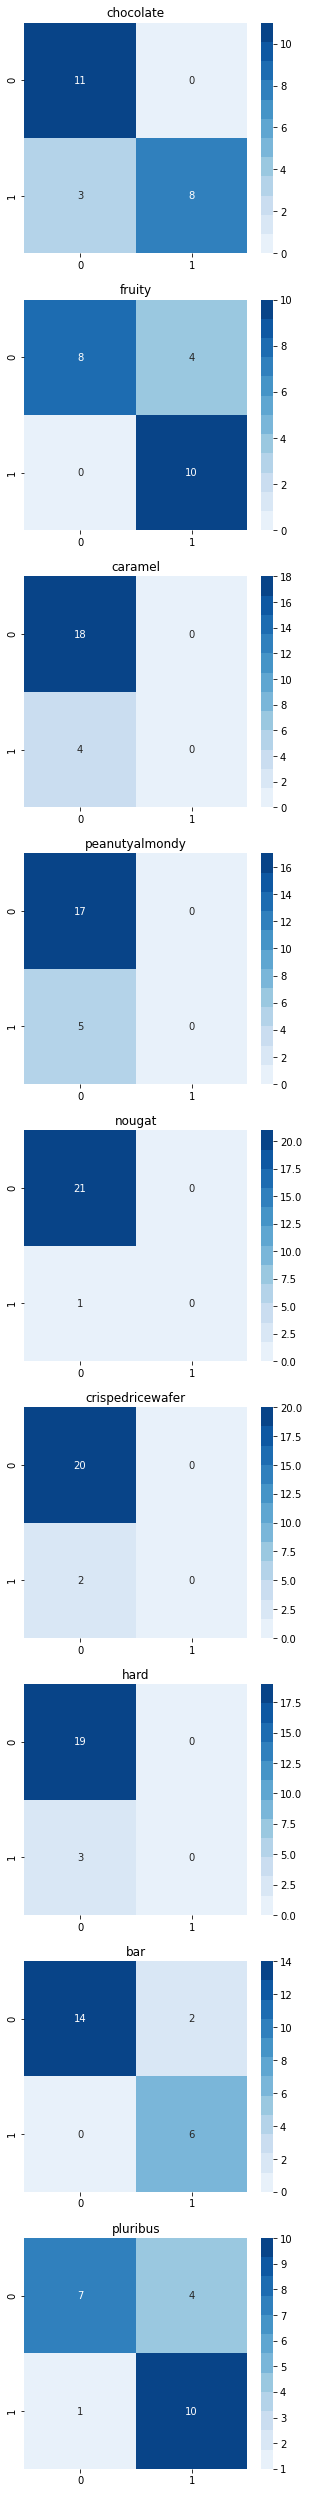

In [11]:
from sklearn.metrics import multilabel_confusion_matrix

classlst = list(dataset.columns.values[1:10])
print(classlst)
conf_mats = multilabel_confusion_matrix(Y_test, Y_pred)

fig, axes = plt.subplots(conf_mats.shape[0], 1, figsize=(5, 45))

for i in range(conf_mats.shape[0]):
    sn.heatmap(conf_mats[i],ax=axes[i], annot=True, cmap=sn.color_palette("Blues",12))
    axes[i].set_title(classlst[i])

### Conclusions <a name="conclusions"></a>

Overall, after examining the confusion matrices as well as our accuracy and F1 matrics, we can conclude that this neural network performs rather poorly in some tasks, whereas in other tasks, notably on predicting the existance of **chocolate**, the Neural Network performs quite good. In the end, you chose to deploy your Neural Network for **Skootles**. The product developemnt team used the values of **90%** popularity and **10%** relative cost as inputs to the network:

In [12]:
X_in = scaler.transform(poly.transform(np.array([[0.1, 90]])))

Y_out = model.predict(X_in).reshape(1, -1)

prediction_df = pd.DataFrame(Y_out, columns=dataset.columns[1:10], index=["Prediction"])
prediction_df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
Prediction,1,0,0,0,0,0,0,1,0


#### Question for Students:

What might be the reason for the poor performance of this Neural Network?
___

## $\mathcal{Fin}$ <a name="fin"></a>

Congrats on reaching the end of this notebook! Hope you have understood the inner workings of Neural Networks, as well as their applications. Up next, we are going to explore Neural Networks using the powerful tools provided in PyTorch. Stay Tuned....

<img src="images/meme.jpeg" alt="cannot display image" width="700px">